Importing Libraries

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation
import matplotlib.pyplot as plt # data visualisation

Loading Data

In [64]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

Getting to Know Data

In [65]:
df.shape

(891, 12)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing Values

In [67]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
new_data = { 'male' : 0, 'female' : 1 }
df["Sex_Number"] = df["Sex"].map(new_data)

Filling Missing Age Values

<Axes: xlabel='Age', ylabel='Density'>

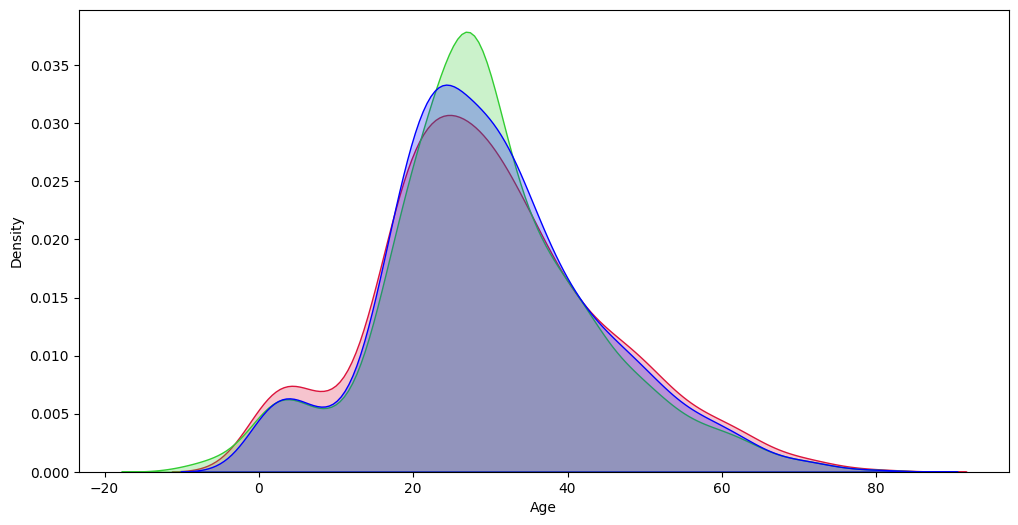

In [69]:
# MICE Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=100, max_iter=10)
df_train_mice = df.loc[:, ["Pclass", "Age", "Sex_Number", "SibSp", "Parch", "Fare"]]
imputer.fit(df_train_mice)
df_imputed_mice = imputer.transform(df_train_mice)
df_mice = pd.DataFrame(df_imputed_mice, columns = ["Pclass", "Age", "Sex_Number", "SibSp", "Parch", "Fare"])

#  KNN Imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 2)
df_train_knn = df.loc[:, ["Pclass", "Age", "Sex_Number", "SibSp", "Parch", "Fare"]]
df_imputed_knn = imputer.fit_transform(df_train_knn)
df_knn = pd.DataFrame(df_imputed_knn, columns = ["Pclass", "Age", "Sex_Number", "SibSp", "Parch", "Fare"])

# Comparing Imputation Age Distribution
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data = df["Age"], color = 'crimson', ax=ax, fill = True)
sns.kdeplot(data = df_mice["Age"], color = 'limegreen', ax=ax, fill = True)
sns.kdeplot(data = df_knn["Age"], color = 'blue', ax=ax, fill = True)

In [70]:
df.loc[:, ["Pclass", "Age", "Sex_Number", "SibSp", "Parch", "Fare"]] = df_knn
df.fillna(df["Embarked"].mode()[0], inplace = True)
df = df.drop(columns = ['Cabin', 'Sex_Number'])

Dealing with Missing Values in test.csv

<Axes: xlabel='Age', ylabel='Density'>

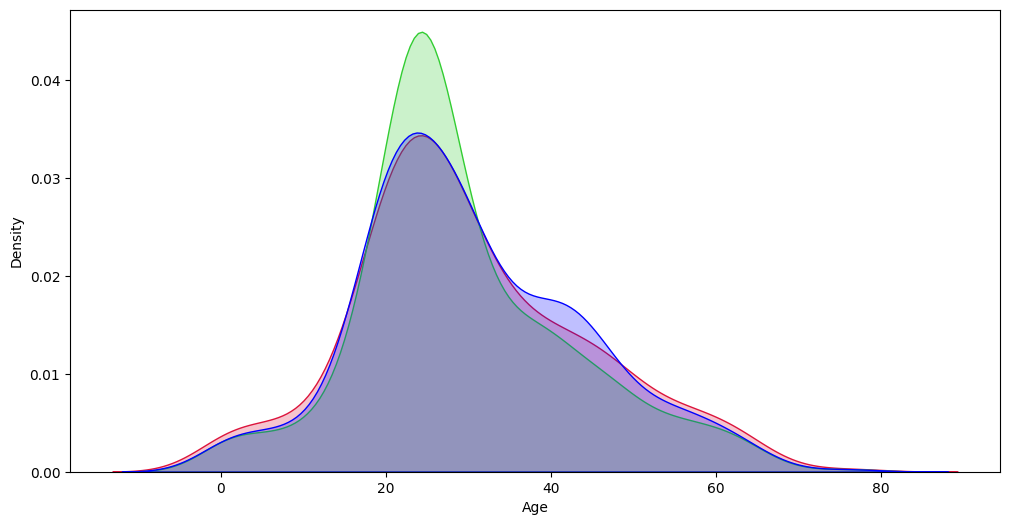

In [71]:
new_data = { 'male' : 0, 'female' : 1 }
df_test["Sex_Number"] = df_test["Sex"].map(new_data)

# MICE
imputer = IterativeImputer(random_state=100, max_iter=10)
df_train_mice = df_test.loc[:, ["Pclass", "Age", "Sex_Number", "SibSp", "Parch", "Fare"]]
imputer.fit(df_train_mice)
df_imputed_mice = imputer.transform(df_train_mice)
df_mice = pd.DataFrame(df_imputed_mice, columns = ["Pclass", "Age", "Sex_Number", "SibSp", "Parch", "Fare"])

# KNN
imputer = KNNImputer(n_neighbors = 2)
df_train_knn = df_test.loc[:, ["Pclass", "Age", "Sex_Number", "SibSp", "Parch", "Fare"]]
df_imputed_knn = imputer.fit_transform(df_train_knn)
df_knn = pd.DataFrame(df_imputed_knn, columns = ["Pclass", "Age", "Sex_Number", "SibSp", "Parch", "Fare"])

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data = df_test["Age"], color = 'crimson', ax=ax, fill = True)
sns.kdeplot(data = df_mice["Age"], color = 'limegreen', ax=ax, fill = True)
sns.kdeplot(data = df_knn["Age"], color = 'blue', ax=ax, fill = True)

In [72]:
df_test.loc[:, ["Pclass", "Age", "Sex_Number", "SibSp", "Parch", "Fare"]] = df_knn
df_test = df_test.drop(columns = ['Cabin', 'Sex_Number'])

Logistic Regression

In [73]:
from sklearn.model_selection import train_test_split # partition the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

y_train = pd.DataFrame(df['Survived'])
df_x = df.drop(columns = ['PassengerId', 'Survived', 'Name', 'Ticket'])
df_test_x = df_test.drop(columns = ['PassengerId', 'Name', 'Ticket'])
x_train = pd.get_dummies(df_x)
x_test = pd.get_dummies(df_test_x)
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
pred = pd.DataFrame(predictions)
pred.columns = ['Survived']
frames = [df_test['PassengerId'], pred]
final = pd.concat(frames, axis = 1)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CSV File

In [74]:
final.to_csv("submission.csv", index = False)